# Learning rate decay

Una cosa que se puede hacer para mejorar el entrenamiento es ir disminuyendo el valor del learning rate a medida que entrenamos. Veamos por qué

Si vemos el efecto de entrenar con un valor de learning rate de 0.025 en el ejemplo anterior

Entrenamiento para lr = 0.025
i=10: error=3.5332415076132806, gradiente=4.434751401390874, a=1.945937013155588
i=20: error=3.463169558318404, gradiente=0.11728176690111386, a=1.990209371273261
i=30: error=3.46312055035669, gradiente=0.0031016423701155796, a=1.9913802013638249
i=40: error=3.463120516080773, gradiente=8.202626584997337e-05, a=1.991411165223878
i=50: error=3.4631205160568, gradiente=2.1692727570984022e-06, a=1.9914119840964342


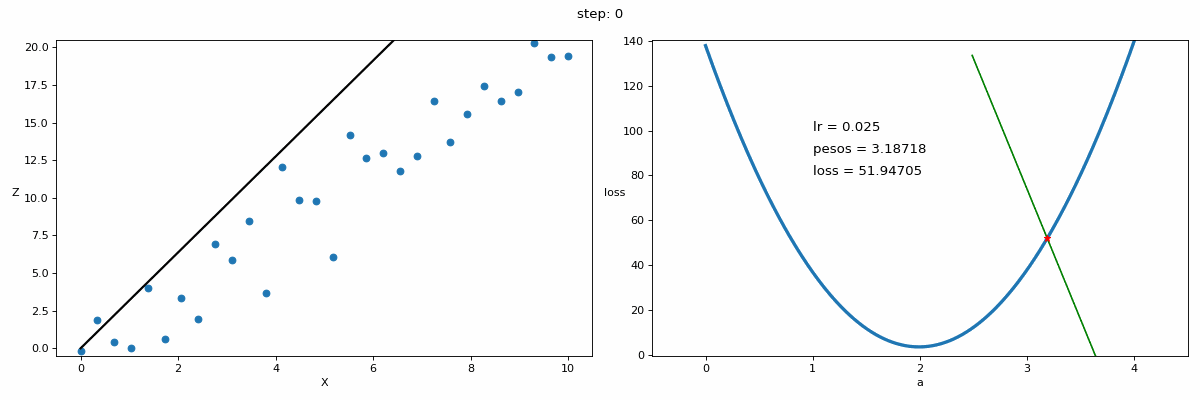

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

z = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

random.seed(45)
a = random.random()

def loss_fn(z, z_p):
    n = len(z)
    loss = np.sum((z_p-z) ** 2) / n
    return loss

posibles_a = np.linspace(0, 4, 300)
perdidas = np.empty_like(posibles_a)

for i in range (len(posibles_a)):
    z_p = posibles_a[i]*x
    perdidas[i] = loss_fn(z, z_p)

def gradiente (a, x, z):
    # Función que calcula el valor de una derivada en un punto
    n = len(z)
    return 2*np.sum((a*x - z)*x)/n

def gradiente_linea (i, a=None, error=None, gradiente=None, posibles_w=None, 
    losses=None, gradientes=None):
    # Función que devuleve los puntos de la linea que supone la derivada de una 
    # función en un punto dado
    if a is None:
        x1 = posibles_w[i]-0.7
        x2 = posibles_w[i]
        x3 = posibles_w[i]+0.7

        b = losses[i] - gradientes[i]*posibles_w[i]

        y1 = gradientes[i]*x1 + b
        y2 = losses[i]
        y3 = gradientes[i]*x3 + b
    else:
        x1 = a-0.7
        x2 = a
        x3 = a+0.7

        b = error - gradiente*a

        y1 = gradiente*x1 + b
        y2 = error
        y3 = gradiente*x3 + b

    x_linea = np.array([x1, x2, x3])
    y_linea = np.array([y1, y2, y3])

    return x_linea, y_linea

LRs = [2.5e-2]    # Tasa de aprendizaje o learning rate
steps = 50  # Numero de veces que se realiza el bucle de enrtenamiento

# Matrices donde se guardarán los datos para luego ver la evolución del entrenamiento en una gráfica
Zs = np.empty([len(LRs), steps, len(x)])
Xs_linea_gradiente = np.empty([len(LRs), steps, 3])
Ys_linea_gradiente = np.empty([len(LRs), steps, 3])
As = np.empty([len(LRs), steps])
Errores = np.empty([len(LRs), steps])

for l, lr in enumerate(LRs):
    # Inicialización aleatoria de a
    random.seed(45)
    a = random.random()
    
    print(f"Entrenamiento para lr = {lr}")
    for i in range(steps):
        # Calculamos el gradiente
        dl = gradiente(a, x, z)

        # Corregimos el valor de a
        a = a - lr*dl

        # Calculamos los valores que obtiene la red neuronal
        z_p = a*x

        # Obtenemos el error
        error = loss_fn(z, z_p)

        # Obtenemos las rectas de los gradientes para representarlas
        x_linea_gradiente, y_linea_gradiente = gradiente_linea(3, a=a, error=error, gradiente=dl)

        # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
        As[l][i] = a
        Zs[l][i] = z_p
        Errores[l][i] = error
        Xs_linea_gradiente[l][i] = x_linea_gradiente
        Ys_linea_gradiente[l][i] = y_linea_gradiente

        # Imprimimos la evolución del entrenamiento
        if (i+1)%10 == 0:
            print(f"i={i+1}: error={error}, gradiente={dl}, a={a}")


# Creamos GIF con la evolución del entrenamiento
rectas = []
gradientes = []
puntos = []
a_texts = []
error_texts = []
lr_texts = []

fontsize = 12

# Creamos la gráfica inicial
fig, ax = plt.subplots(len(LRs),2, figsize=(15, 5*len(LRs)))
ax = ax.reshape(len(LRs),ax.shape[0])
fig.set_tight_layout(True)
for i in range(len(LRs)):
    ax[i][0].set_xlabel('X')
    ax[i][0].set_ylabel('Z  ', rotation=0)
    ax[i][1].set_xlabel('a')
    ax[i][1].set_ylabel('loss  ', rotation=0)
    ax[i][0].set_xlim(-0.5, 10.5)
    ax[i][0].set_ylim(-0.5, 20.5)
    ax[i][1].set_xlim(-0.5, 4.5)
    ax[i][1].set_ylim(-0.5, 140.5)

    # Se dibujan los datos que persistiran en toda la evolución de la gráfica
    ax[i][0].scatter(x, z)
    ax[i][1].plot(posibles_a, perdidas, linewidth = 3)

    # Se dibuja el resto de lineas que irán cambiando durante el entrenamiento
    line1, = ax[i][0].plot(x, Zs[i][0], 'k', linewidth=2)                             # Recta generada con la pendiente a aprendida
    line2, = ax[i][1].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    punto, = ax[i][1].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    rectas.append(line1)
    gradientes.append(line2)
    puntos.append(punto)

    # Se dibujan textos dentro de la segunda figura del subplot
    lr_text = ax[i][1].text(1, 100, f'lr = {LRs[i]}', fontsize = fontsize)
    a_text = ax[i][1].text(1, 90, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    error_text = ax[i][1].text(1, 80, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    a_texts.append(a_text)
    error_texts.append(error_text)
    lr_texts.append(lr_text)
    
# Se dibuja un título
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):

    for l, _ in enumerate(LRs):
        # Se actualiza la recta generada con la pendiente a aprendida
        rectas[l].set_ydata(Zs[l][i])

        # Se actualiza el gradiente de la función de error
        gradientes[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes[l].set_ydata(Ys_linea_gradiente[l][i])

        # Se actualiza el punto 2. Punto donde se calcula el gradiente
        puntos[l].set_xdata([As[l][i]])
        puntos[l].set_ydata([Errores[l][i]])

        # Se actualizan los textos
        a_texts[l].set_text(f'pesos = {As[l][i]:.5f}')
        error_texts[l].set_text(f'loss = {Errores[l][i]:.5f}')
        lr_texts[l].set_text(f'lr = {LRs[l]}')
    
    titulo.set_text(f'step: {i}')

    return line1, # ax1, #line2, punto2, ax2, a_text, error_text

# Se crea la animación con un refresco cada 200 ms
interval = 500 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/LR_noDecay.gif"
anim.save(gif_name, dpi=80, writer='pillow') 

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

Como se puede ver desde el step 15 el error no cambia mucho, en 15 steps se ha llegado a la mejor solución posible, pero vamos a ver si hacemos zoom en la zona del mínimo error

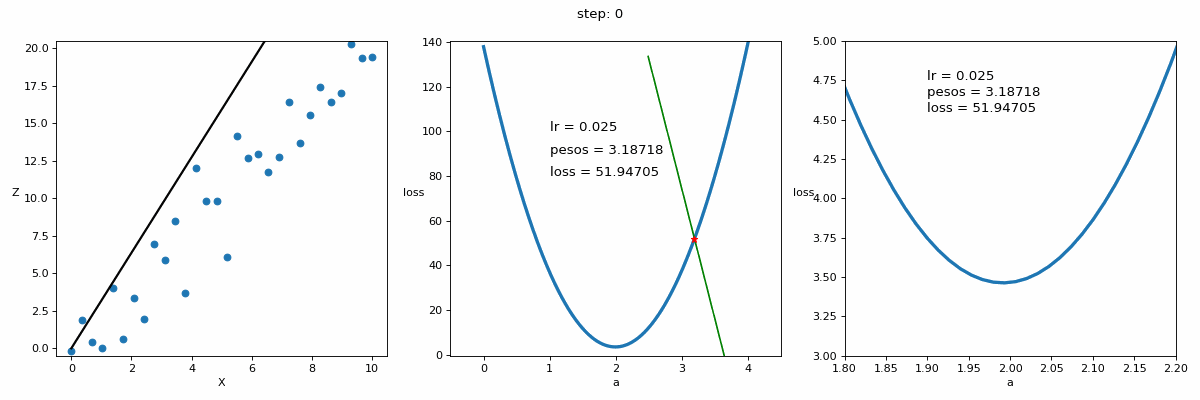

In [2]:
# Creamos GIF con la evolución del entrenamiento
rectas = []
gradientes1 = []
gradientes2 = []
puntos1 = []
puntos2 = []
a_texts1 = []
a_texts2 = []
error_texts1 = []
error_texts2 = []
lr_texts1 = []
lr_texts2 = []


fontsize = 12

# Creamos la gráfica inicial
fig, ax = plt.subplots(len(LRs),3, figsize=(15, 5*len(LRs)))
ax = ax.reshape(len(LRs),ax.shape[0])
fig.set_tight_layout(True)
for i in range(len(LRs)):
    ax[i][0].set_xlabel('X')
    ax[i][0].set_ylabel('Z  ', rotation=0)
    ax[i][1].set_xlabel('a')
    ax[i][1].set_ylabel('loss  ', rotation=0)
    ax[i][2].set_xlabel('a')
    ax[i][2].set_ylabel('loss  ', rotation=0)
    ax[i][0].set_xlim(-0.5, 10.5)
    ax[i][0].set_ylim(-0.5, 20.5)
    ax[i][1].set_xlim(-0.5, 4.5)
    ax[i][1].set_ylim(-0.5, 140.5)
    ax[i][2].set_xlim(1.8, 2.2)
    ax[i][2].set_ylim(3, 5.0)

    # Se dibujan los datos que persistiran en toda la evolución de la gráfica
    ax[i][0].scatter(x, z)
    ax[i][1].plot(posibles_a, perdidas, linewidth = 3)
    ax[i][2].plot(posibles_a, perdidas, linewidth = 3)

    # Se dibuja el resto de lineas que irán cambiando durante el entrenamiento
    recta, = ax[i][0].plot(x, Zs[i][0], 'k', linewidth=2)                             # Recta generada con la pendiente a aprendida
    gradiente1, = ax[i][1].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    gradiente2, = ax[i][2].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    punto1, = ax[i][1].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    punto2, = ax[i][2].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    rectas.append(recta)
    gradientes1.append(gradiente1)
    gradientes2.append(gradiente2)
    puntos1.append(punto1)
    puntos2.append(punto2)

    # Se dibujan textos dentro de la segunda figura del subplot
    lr_text1 = ax[i][1].text(1, 100, f'lr = {LRs[i]}', fontsize = fontsize)
    lr_text2 = ax[i][2].text(1.9, 4.75, f'lr = {LRs[i]}', fontsize = fontsize)
    a_text1 = ax[i][1].text(1, 90, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    a_text2 = ax[i][2].text(1.9, 4.65, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    error_text1 = ax[i][1].text(1, 80, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    error_text2 = ax[i][2].text(1.9, 4.55, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    a_texts1.append(a_text1)
    a_texts2.append(a_text2)
    error_texts1.append(error_text1)
    error_texts2.append(error_text2)
    lr_texts1.append(lr_text1)
    lr_texts2.append(lr_text2)
    
# Se dibuja un título
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):

    for l, _ in enumerate(LRs):
        # Se actualiza la recta generada con la pendiente a aprendida
        rectas[l].set_ydata(Zs[l][i])

        # Se actualiza el gradiente de la función de error
        gradientes1[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes1[l].set_ydata(Ys_linea_gradiente[l][i])
        gradientes2[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes2[l].set_ydata(Ys_linea_gradiente[l][i])

        # Se actualiza el punto 2. Punto donde se calcula el gradiente
        puntos1[l].set_xdata([As[l][i]])
        puntos1[l].set_ydata([Errores[l][i]])
        puntos2[l].set_xdata([As[l][i]])
        puntos2[l].set_ydata([Errores[l][i]])

        # Se actualizan los textos
        a_texts1[l].set_text(f'pesos = {As[l][i]:.5f}')
        a_texts2[l].set_text(f'pesos = {As[l][i]:.5f}')
        error_texts1[l].set_text(f'loss = {Errores[l][i]:.5f}')
        error_texts2[l].set_text(f'loss = {Errores[l][i]:.5f}')
        lr_texts1[l].set_text(f'lr = {LRs[l]}')
        lr_texts2[l].set_text(f'lr = {LRs[l]}')
    
    titulo.set_text(f'step: {i}')

    return line1, # ax1, #line2, punto2, ax2, a_text, error_text

# Se crea la animación con un refresco cada 200 ms
interval = 500 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/LR_noDecay_zoom.gif"
anim.save(gif_name, dpi=80, writer='pillow') 

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

Como se puede ver, si se hace zoom, el punto va dando saltos al rededor del mínimo

Vemos qué pasa si vamos disminuyendo el valor del learning rate a medida que vamos entrenando

Entrenamiento para lr = 0.025
i=10: error=3.5332415076132806, gradiente=4.434751401390874, a=1.945937013155588
i=20: error=3.463169558318404, gradiente=0.11728176690111386, a=1.990209371273261

Entrenamiento para lr = 0.025
i=10: error=3.46312053385814, gradiente=0.010202610187635781, a=1.9914349189821918
i=20: error=3.4631205160568017, gradiente=2.662718301434571e-06, a=1.9914120289624948



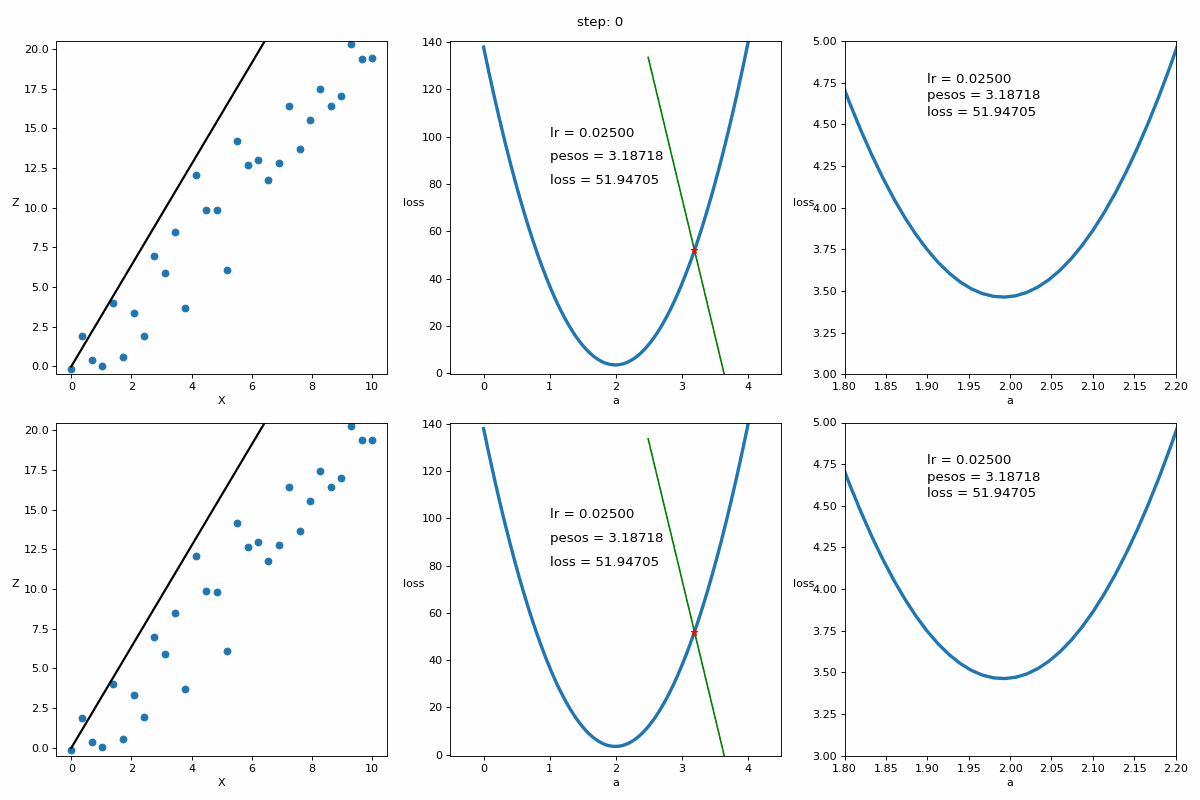

In [3]:
LRs = [2.5e-2, 2.5e-2]    # Tasa de aprendizaje o learning rate
steps = 20  # Numero de veces que se realiza el bucle de enrtenamiento

# Matrices donde se guardarán los datos para luego ver la evolución del entrenamiento en una gráfica
Zs = np.empty([len(LRs), steps, len(x)])
Xs_linea_gradiente = np.empty([len(LRs), steps, 3])
Ys_linea_gradiente = np.empty([len(LRs), steps, 3])
As = np.empty([len(LRs), steps])
Errores = np.empty([len(LRs), steps])
LR_values = np.empty([len(LRs), steps])
lr_decay = 0

for l, lr in enumerate(LRs):
    # Inicialización aleatoria de a
    random.seed(45)
    a = random.random()
    
    print(f"Entrenamiento para lr = {lr}")
    for i in range(steps):
        # Calculamos el gradiente
        dl = gradiente(a, x, z)

        # Corregimos el valor de a
        if l == 0:
            lr_decay = lr
            a -= lr * dl
        else:
            if i >= 0 and i < 5:
                lr_decay = lr
            elif i >= 5 and i < 10:
                lr_decay = lr/2
            elif i >= 10 and i < 15:
                lr_decay = lr/3
            elif i >= 15 and i < 20:
                lr_decay = lr/4
            a = a - lr_decay*dl

        # Calculamos los valores que obtiene la red neuronal
        z_p = a*x

        # Obtenemos el error
        error = loss_fn(z, z_p)

        # Obtenemos las rectas de los gradientes para representarlas
        x_linea_gradiente, y_linea_gradiente = gradiente_linea(3, a=a, error=error, gradiente=dl)

        # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
        As[l][i] = a
        Zs[l][i] = z_p
        Errores[l][i] = error
        Xs_linea_gradiente[l][i] = x_linea_gradiente
        Ys_linea_gradiente[l][i] = y_linea_gradiente
        LR_values[l][i] = lr_decay

        # Imprimimos la evolución del entrenamiento
        if (i+1)%10 == 0:
            print(f"i={i+1}: error={error}, gradiente={dl}, a={a}")
        
    print()



# Creamos GIF con la evolución del entrenamiento
rectas = []
gradientes1 = []
gradientes2 = []
puntos1 = []
puntos2 = []
a_texts1 = []
a_texts2 = []
error_texts1 = []
error_texts2 = []
lr_texts1 = []
lr_texts2 = []


fontsize = 12

# Creamos la gráfica inicial
fig, ax = plt.subplots(len(LRs),3, figsize=(15, 5*len(LRs)))
fig.set_tight_layout(True)
for i in range(len(LRs)):
    ax[i][0].set_xlabel('X')
    ax[i][0].set_ylabel('Z  ', rotation=0)
    ax[i][1].set_xlabel('a')
    ax[i][1].set_ylabel('loss  ', rotation=0)
    ax[i][2].set_xlabel('a')
    ax[i][2].set_ylabel('loss  ', rotation=0)
    ax[i][0].set_xlim(-0.5, 10.5)
    ax[i][0].set_ylim(-0.5, 20.5)
    ax[i][1].set_xlim(-0.5, 4.5)
    ax[i][1].set_ylim(-0.5, 140.5)
    ax[i][2].set_xlim(1.8, 2.2)
    ax[i][2].set_ylim(3, 5.0)

    # Se dibujan los datos que persistiran en toda la evolución de la gráfica
    ax[i][0].scatter(x, z)
    ax[i][1].plot(posibles_a, perdidas, linewidth = 3)
    ax[i][2].plot(posibles_a, perdidas, linewidth = 3)

    # Se dibuja el resto de lineas que irán cambiando durante el entrenamiento
    recta, = ax[i][0].plot(x, Zs[i][0], 'k', linewidth=2)                             # Recta generada con la pendiente a aprendida
    gradiente1, = ax[i][1].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    gradiente2, = ax[i][2].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    punto1, = ax[i][1].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    punto2, = ax[i][2].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    rectas.append(recta)
    gradientes1.append(gradiente1)
    gradientes2.append(gradiente2)
    puntos1.append(punto1)
    puntos2.append(punto2)

    # Se dibujan textos dentro de la segunda figura del subplot
    lr_text1 = ax[i][1].text(1, 100, f'lr = {LR_values[i][0]:.5f}', fontsize = fontsize)
    lr_text2 = ax[i][2].text(1.9, 4.75, f'lr = {LR_values[i][0]:.5f}', fontsize = fontsize)
    a_text1 = ax[i][1].text(1, 90, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    a_text2 = ax[i][2].text(1.9, 4.65, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    error_text1 = ax[i][1].text(1, 80, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    error_text2 = ax[i][2].text(1.9, 4.55, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    a_texts1.append(a_text1)
    a_texts2.append(a_text2)
    error_texts1.append(error_text1)
    error_texts2.append(error_text2)
    lr_texts1.append(lr_text1)
    lr_texts2.append(lr_text2)
    
# Se dibuja un título
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):

    for l, _ in enumerate(LRs):
        # Se actualiza la recta generada con la pendiente a aprendida
        rectas[l].set_ydata(Zs[l][i])

        # Se actualiza el gradiente de la función de error
        gradientes1[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes1[l].set_ydata(Ys_linea_gradiente[l][i])
        gradientes2[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes2[l].set_ydata(Ys_linea_gradiente[l][i])

        # Se actualiza el punto 2. Punto donde se calcula el gradiente
        puntos1[l].set_xdata([As[l][i]])
        puntos1[l].set_ydata([Errores[l][i]])
        puntos2[l].set_xdata([As[l][i]])
        puntos2[l].set_ydata([Errores[l][i]])

        # Se actualizan los textos
        a_texts1[l].set_text(f'pesos = {As[l][i]:.5f}')
        a_texts2[l].set_text(f'pesos = {As[l][i]:.5f}')
        error_texts1[l].set_text(f'loss = {Errores[l][i]:.5f}')
        error_texts2[l].set_text(f'loss = {Errores[l][i]:.5f}')
        lr_texts1[l].set_text(f'lr = {LR_values[l][i]:.5f}')
        lr_texts2[l].set_text(f'lr = {LR_values[l][i]:.5f}')
    
    titulo.set_text(f'step: {i}')

    return line1, # ax1, #line2, punto2, ax2, a_text, error_text

# Se crea la animación con un refresco cada 200 ms
interval = 500 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/LR_decay.gif"
anim.save(gif_name, dpi=80, writer='pillow') 

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

Como se puede ver, cuando estamos cerca del mínimo error, es buena idea ir disminuyendo el valor del learning rate para que se ajuste mejor al problema.

Aquí se ha mostrado un ejemplo en el que se reduce el valor del learnig rate cada 5 steps, para que sea ilustrativo. Pero en la realidad, lo que se suele hacer es que si despues de varias épocas, el error, o la métrica que se esté usando, no mejora, se reduce el valor del learning rate

Ahora en vez de llegar a la solución en torno al step 15, se llega en el step 7

## Implementación en Pytorch

Vamos a ver cómo se hace esto en Pytorch. Vamos a verlo con el ejemplo del dataset de Cancer

In [4]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [5]:
import pandas as pd

cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df['type'] = cancer['target']
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Se crea el dataset y el dataloader

In [6]:
import torch

class CancerDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        cols = [col for col in dataframe.columns if col != 'target']
        self.parameters = torch.from_numpy(dataframe[cols].values).type(torch.float32)
        self.targets = torch.from_numpy(dataframe['type'].values).type(torch.float32)
        self.targets = self.targets.reshape((len(self.targets), 1))

    def __len__(self):
        return len(self.parameters)

    def __getitem__(self, idx):
        parameters = self.parameters[idx]
        target = self.targets[idx]
        return parameters, target

ds = CancerDataset(cancer_df)

En este caso no se va a dividir el dataset en uno de entrenamiento y otro de validación, porque el dataset tiene tan pocos datos, que para poder hacer el ejemplo es necesario usar todos los datos

In [7]:
train_ds = ds
len(train_ds)

569

In [8]:
from torch.utils.data import DataLoader

BS_train = 64
train_dl = DataLoader(train_ds, batch_size=BS_train, shuffle=True)

Creamos la red

In [9]:
from torch import nn

class CancerNeuralNetwork(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_layers=[100, 50, 20]):
        super().__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(num_inputs, hidden_layers[0]),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_layers[0], hidden_layers[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_layers[1], hidden_layers[2]),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_layers[2], num_outputs),
        )
        self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        logits = self.network(x)
        probs = self.activation(logits)
        return logits, probs

Instanciamos la red y la llevamos a la GPU

In [10]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Se define una semilla para que la inicialización de los pesos aleatoria sea siempre la misma
seed = 27
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

model = CancerNeuralNetwork(31, 1)
model.to(device)

print("Using {} device".format(device))

Using cuda device


Declaramos la función de pérdida y el optimizador

In [11]:
LR = 1e-3

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

Creamos ahora el método que irá reduciendo el valor del learning rate. Hay varios métodos de reducir el learning rate, pero vamos a ver solo dos. Uno en el que se reduce continuamente el learnirg rate de una manera exponencial, y otro en el que se reduce si la métrica que estemos usando no mejora

 1. Metodo de reducción exponencial (ExponentialLR)
  * El primer método multiplica el learning rate por un valor gamma, en este caso 0.9.
  * Además ponemos el parámetro verbose a True para que se muestre el valor del learning rate
  * El primer parámetro que se le pasa es optimizer, es decir, le tenemos que pasar el optimizador que hemos definido

2. Método de reducción si la métrica no mejora (ReduceLROnPlateau)
  * El primer parámetro es el optimizer, es decir, le tenemos que pasar el optimizador que hemos definido
  * El tercer parámetro es el factor de reducción, en este caso 0.1
  * El cuarto parámetro es el número de epocas que se tienen que pasar antes de reducir el learning rate, en este caso 10
  * El quinto parámetro es el verbose, en este caso True

In [12]:
# El primer método multiplica el learning rate por un valor gamma, en este caso 0.9.
# Además ponemos el parámetro verbose a True para que se muestre el valor del learning rate
# El primer parámetro que se le pasa es optimizer, es decir, le tenemos que pasar el optimizador 
# que hemos definido
schedulerExponential = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, verbose=True)

# El segundo método comprueba si en 10 épocas (patience=2), lam métrica no disminuye (mode='min')
# Si no lo hace, se reduce el learning rate multiplicándolo por un valor factor, en este caso 0.1
# Al igual que antes, ponemos el parámetro verbose a True para que se muestre el valor del learning rate
schedulerOnPlateau = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-03.


Creamos el ciclo de entrenamiento. Ahora durante el ciclo de entrenamiento tendremos que llamar al método `step()` de cada uno de los optimizadores, pero en el caso de usar el método de reducción si la métrica no mejora, dentro del método `step()` hay que pasarle la métrica que estemos usando

Por último definimos la función de entrenamiento

In [13]:
num_prints = 4

def train_loop(dataloader, model, loss_fn, optimizer, scheduler=None, onPlateau=False):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # X and y to device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        logits, _ = model(X)
        loss = loss_fn(logits, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % int(len(dataloader)/num_prints) == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    # Learning rate scheduler
    if scheduler is not None:
        if onPlateau:
            scheduler.step(loss)
        else:
            scheduler.step()

Vamos a comparar el entrenamiento sin reducción del learning rate, con cada uno de los métodos que hemos visto y con los dos a la vez

### Sin reducción del learning rate

Creamos todo desde cero y entrenamos la red sin reducir el learning rate

In [14]:
# Se define una semilla para que la inicialización de los pesos aleatoria sea siempre la misma
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
model = CancerNeuralNetwork(31, 1)
model.to(device)
print("Using {} device".format(device))

LR = 1e-3
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

Using cuda device


Se entrena durante 500 épocas para ver mejor el efecto

In [15]:
epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer, scheduler=None)
print(f"Done! lr = {optimizer.param_groups[0]['lr']}")

Epoch 1
-------------------------------
loss: 1.010836  [    0/  569]
loss: 4.976827  [  128/  569]
loss: 1.088194  [  256/  569]
loss: 0.989770  [  384/  569]
loss: 2.056178  [  456/  569]
Epoch 2
-------------------------------
loss: 2.452760  [    0/  569]
loss: 0.852048  [  128/  569]
loss: 1.305434  [  256/  569]
loss: 1.547947  [  384/  569]
loss: 0.906878  [  456/  569]
Epoch 3
-------------------------------
loss: 0.809825  [    0/  569]
loss: 0.795045  [  128/  569]
loss: 0.638141  [  256/  569]
loss: 0.690193  [  384/  569]
loss: 1.183609  [  456/  569]
Epoch 4
-------------------------------
loss: 0.689182  [    0/  569]
loss: 0.708077  [  128/  569]
loss: 0.727929  [  256/  569]
loss: 0.612084  [  384/  569]
loss: 0.569775  [  456/  569]
Epoch 5
-------------------------------
loss: 0.583048  [    0/  569]
loss: 0.605605  [  128/  569]
loss: 0.597755  [  256/  569]
loss: 0.593265  [  384/  569]
loss: 0.555763  [  456/  569]
Epoch 6
-------------------------------
loss: 0.56

### Reducción del learning rate exponencial

Vamos a ver el mismo ejemplo reduciendo el learning rate exponencialmente

In [16]:
# Se define una semilla para que la inicialización de los pesos aleatoria sea siempre la misma
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
model = CancerNeuralNetwork(31, 1)
model.to(device)
print("Using {} device".format(device))

LR = 1e-3
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

schedulerExponential = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, verbose=True)

Using cuda device
Adjusting learning rate of group 0 to 1.0000e-03.


In [17]:
epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer, scheduler=schedulerExponential, onPlateau=False)
print(f"Done! lr = {optimizer.param_groups[0]['lr']}")

Epoch 1
-------------------------------
loss: 1.010836  [    0/  569]
loss: 4.976827  [  128/  569]
loss: 1.088194  [  256/  569]
loss: 0.989770  [  384/  569]
loss: 2.056178  [  456/  569]
Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 2
-------------------------------
loss: 2.452760  [    0/  569]
loss: 0.817813  [  128/  569]
loss: 1.102006  [  256/  569]
loss: 0.719499  [  384/  569]
loss: 0.860593  [  456/  569]
Adjusting learning rate of group 0 to 8.1000e-04.
Epoch 3
-------------------------------
loss: 1.076755  [    0/  569]
loss: 0.695023  [  128/  569]
loss: 0.957785  [  256/  569]
loss: 0.903346  [  384/  569]
loss: 1.135582  [  456/  569]
Adjusting learning rate of group 0 to 7.2900e-04.
Epoch 4
-------------------------------
loss: 0.701673  [    0/  569]
loss: 0.648563  [  128/  569]
loss: 0.670573  [  256/  569]
loss: 0.607591  [  384/  569]
loss: 0.579254  [  456/  569]
Adjusting learning rate of group 0 to 6.5610e-04.
Epoch 5
-------------------------------


En este caso podemos ver que no se ha mejorado. Podría ser porque el valor del learning rate ha bajado tan rápido que se ha hecho muy pequeño y en el entrenamiento no mejora

### Reducción del learning si la métrica no mejora

Vamos a ver el mismo ejemplo reduciendo el learning rate cuando la métrica no mejora

In [18]:
# Se define una semilla para que la inicialización de los pesos aleatoria sea siempre la misma
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
model = CancerNeuralNetwork(31, 1)
model.to(device)
print("Using {} device".format(device))

LR = 1e-3
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

schedulerOnPlateau = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

Using cuda device


In [19]:
epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer, scheduler=schedulerOnPlateau, onPlateau=True)
print(f"Done! lr = {optimizer.param_groups[0]['lr']}")

Epoch 1
-------------------------------
loss: 1.010836  [    0/  569]
loss: 4.976827  [  128/  569]
loss: 1.088194  [  256/  569]
loss: 0.989770  [  384/  569]
loss: 2.056178  [  456/  569]
Epoch 2
-------------------------------
loss: 2.452760  [    0/  569]
loss: 0.852048  [  128/  569]
loss: 1.305434  [  256/  569]
loss: 1.547947  [  384/  569]
loss: 0.906878  [  456/  569]
Epoch 3
-------------------------------
loss: 0.809825  [    0/  569]
loss: 0.795045  [  128/  569]
loss: 0.638141  [  256/  569]
loss: 0.690193  [  384/  569]
loss: 1.183609  [  456/  569]
Epoch 4
-------------------------------
loss: 0.689182  [    0/  569]
loss: 0.708077  [  128/  569]
loss: 0.727929  [  256/  569]
loss: 0.612084  [  384/  569]
loss: 0.569775  [  456/  569]
Epoch 5
-------------------------------
loss: 0.583048  [    0/  569]
loss: 0.605605  [  128/  569]
loss: 0.597755  [  256/  569]
loss: 0.593265  [  384/  569]
loss: 0.555763  [  456/  569]
Epoch 6
-------------------------------
loss: 0.56

En este caso tampoco ha mejorado. Probablemente para este problema un lr de 10<sup>-3</sup> es suficiente y no hace falta reducir el learning rate

### Reducción del learning exponencialmente y si la métrica no mejora

Vamos a ver el mismo ejemplo usando los dos métodos. Rededfinimos la función de entrenamiento

In [20]:
num_prints = 4

def train_loop(dataloader, model, loss_fn, optimizer, scheduler1=None, scheduler2=None):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # X and y to device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        logits, probs = model(X)
        loss = loss_fn(logits, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % int(len(dataloader)/num_prints) == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    # Learning rate scheduler
    if scheduler1 is not None and scheduler2 is not None:
        scheduler1.step(loss)
        scheduler2.step()

In [21]:
# Se define una semilla para que la inicialización de los pesos aleatoria sea siempre la misma
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
model = CancerNeuralNetwork(31, 1)
model.to(device)
print("Using {} device".format(device))

LR = 1e-3
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

schedulerExponential = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, verbose=True)
schedulerOnPlateau = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

Using cuda device
Adjusting learning rate of group 0 to 1.0000e-03.


In [22]:
epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer, scheduler1=schedulerOnPlateau, scheduler2=schedulerExponential)
print(f"Done! lr = {optimizer.param_groups[0]['lr']}")

Epoch 1
-------------------------------
loss: 1.010836  [    0/  569]
loss: 4.976827  [  128/  569]
loss: 1.088194  [  256/  569]
loss: 0.989770  [  384/  569]
loss: 2.056178  [  456/  569]
Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 2
-------------------------------
loss: 2.452760  [    0/  569]
loss: 0.817813  [  128/  569]
loss: 1.102006  [  256/  569]
loss: 0.719499  [  384/  569]
loss: 0.860593  [  456/  569]
Adjusting learning rate of group 0 to 8.1000e-04.
Epoch 3
-------------------------------
loss: 1.076755  [    0/  569]
loss: 0.695023  [  128/  569]
loss: 0.957785  [  256/  569]
loss: 0.903346  [  384/  569]
loss: 1.135582  [  456/  569]
Adjusting learning rate of group 0 to 7.2900e-04.
Epoch 4
-------------------------------
loss: 0.701673  [    0/  569]
loss: 0.648563  [  128/  569]
loss: 0.670573  [  256/  569]
loss: 0.607591  [  384/  569]
loss: 0.579254  [  456/  569]
Adjusting learning rate of group 0 to 6.5610e-04.
Epoch 5
-------------------------------


En este caso tampoco ha mejorado, al igual que cuando solo hemos reducido exponencialmente el learning rate, puede que se haya reducido tan rápido que la velocidad de entrenamiento sea muy lenta.

Hay que tener en cuenta que este es un ejemplo muy pequeño y nuestra red es muy pequeña también. Pero en casos en los que el problema sea más grande y usemos redes más grandes probablemente si se vean mejoras usando este método.

De momento solo lo he mostrado como ejemplo, no quiero liar ahora entrenando modelos más grandes con muchos más datos.